# Time Implicit Scheme for Heat Diffusion Eqn

We can avoid the previous constraint for the time explicit scheme by constructing an explicit scheme. It's essentially the same, except we now evaluate the spatial derivative at the new time step!

$\frac{u^{n+1}_i-u^n_i}{\delta t}=\sigma \frac{u^{n+1}_{i+1}-2u^{n+1}_{i}+u^{n+1}_{i-1}}{\delta x^2}$

So we need to solve for 3 unknowns:

$\{u^{n+1}_{i+1},u^{n+1}_{i},u^{n+1}_{i-1}\}$

And with this we get an amplification factor of 

$\lambda = \frac{1}{1+4\mu sin^2 (\frac{k\delta x}{2})}$ which is always less or equal to 1 for all $k$!

A reminder that $\mu=\frac{\sigma \delta t}{\delta x^2}$

Now to solve our system of equations...

Let $A=\frac{\sigma \delta t}{\delta x^2}$ and 
$B=1+2\sigma\frac{delta t}{\delta x^2}$

So for the first equation we get

$Au^{n+1}_{i-1}-Bu^{n+1}_{i}+Au^{n+1}_{i+1}=-u^n_i$

We need to build a matrix!

Lets start from the left and work rightward:

Grid point 1: known from B.C.

Grid point 2: $-Bu^{n+1}_{2}+Au^{n+1}_{3}=-u^n_2-Au^{n+1}_{1}$

Grid point 3: $Au^{n+1}_{2}-Bu^{n+1}_{3}+Au^{n+1}_{4}=-u^n_3$

...

$\begin{pmatrix}
-B & A & 0 & 0 & \cdots  & 0 & 0 & 0 & 0\\
A & -B & A & 0  & \cdots  & 0 & 0 & 0 & 0\\
0 & A & -B & A &  \cdots  & 0 & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots& \vdots\\
0 & 0 & 0 & 0 & \cdots & A & -B & A & 0\\
0 & 0 & 0 & 0 & \cdots & 0 & A & -B & A\\
0 & 0 & 0 & 0 & \cdots & 0 & 0 & A & -B\\
\end{pmatrix}
\begin{pmatrix}
u^{n+1}_{2}\\
u^{n+1}_{3}\\
u^{n+1}_{4}\\
\vdots\\
u^{n+1}_{i-2}\\
u^{n+1}_{i-1}\\
u^{n+1}_{i}\\
\end{pmatrix}
=
\begin{pmatrix}
u^{n}_{2}-Au^{n+1}_{1}\\
u^{n}_{3}\\
u^{n}_{4}\\
\vdots\\
u^{n}_{i-2}\\
u^{n}_{i-1}\\
u^{n+1}_{i}-Au^{n+1}_{i}\\
\end{pmatrix}$

So for the price of matrix inversion, we get an unconditionally stable scheme!

### Linear Scalar Advection Equation

This is a hyperbolic PDE so it's also initial value:

$\frac{\partial u}{\partial t}+a\frac{\partial u}{\partial x}=0$

where $a>0$

The analytic solution is incredibly simple. If we have an initial condition of $u_0(x)$ then the solution is $u(x,t)=u_0(x-at)$

So the 'characteristics' of the Linear Scalar Advection eqn are straight lines in $x$ and $t$ of slope $a$. 

So this PDE is __shape preserving__

Let's look again at the amplification factor!

$\lambda_{PDE}=\frac{u(x,t+\delta t)}{u(x,t)}$

we can use a trial solution $u(x,t)=u_0e^{ik(x-at)}$

thus finding the true amplification factor:

$\lambda_{PDE}=e^{-iak\delta t}$

Up until now we have only be consdiering the MAGNITUDE of the amplification factor. The magnitude of the amplification factor is crucial to determine the __stability__. However, the phase is also important, and __phase errors__ lead to __dispersion__ (i.e. it does not preserve how the shape would actually change in the real PDE)

So the phase factor is constant for this PDE, which is $-ak\delta t$

Let's do a finite difference approximation.

$\frac{u^{n+1}_j-u^n_j}{\delta t}=-a\frac{u^n_{j+1}-u^n_{j-1}}{2\delta x}$

So we have constructed an explicit scheme which is called __FTCS__ standing for 'Forward Time Centred Space'

$u^{n+1}_j=u^{n}_j-\frac{\mu}{2}(u^n_{j+1}-u^n_{j-1})$ where $\mu=\frac{a\delta t}{\delta x}$

If we do Von Neumann Stability Analysis, we find that the amplification factor is:

$\lambda = 1 - i \mu sin(k\delta x)$

Note that this amplification factor is GREATER THAN 1 for ALL WAVENUMBERS. So UNCONDITIONALLY UNSTABLE!

Let's look at an early attempt to fix this

### Lax FriedRichs Scheme

we replace $u^n_j$ with $\frac{1}{2}(u^n_{j+1}+u^n_{j-1})$

so instead we get:

$u^{n+1}_j=\frac{1}{2}(u^n_{j+1}+u^n_{j-1})-\frac{\mu}{2}(u^n_{j+1}-u^n_{j-1})$

So instead our amplification factor is now:

$cos(k\delta x)-i\mu sin(k\delta x)$

which is less than or equal to 1 if $\mu \leq 1$ so we get $\delta d \leq \frac{\delta x}{a}$

This is a very famous stability condition, called the __CFL__ (Courant Friedrichs Lewy) Condition


Why did this modification fix this scheme? Well if we rearange the new scheme slightly we get:

$\frac{u^{n+1}_j-u^n_j}{\delta t}=-a\frac{u^n_{j+1}-u^n_{j-1}}{2\delta x}+\frac{1}{2}\frac{u^n_{j+1}-2u^n_j+u^n_{j-1}}{\delta t}$

The first two terms are just the FTCS scheme, while the last term is equal to:

$\frac{\delta x^2}{2\delta t}\frac{\partial ^2 u}{\partial x^2}$

which looks like a diffusion coefficent term! It is a numerical dissipation term which damps growing modes in order to make the scheme stable!

Furthermore, the stability of the scheme can be thought of in terms of the characteristic lines of the advection equation. In a way, the $a$ can be thought of as the maximum speed that information travels. So if we fulfil the stability condition, it turns out that the domain of influence of each point encompasses (and possibly exceeds) the true, PDE domain of influence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [53]:
bl=-0.5
br=0.5
ndp=100
mu=0.4455
a=1

ti=0
tf=0.8

x=np.linspace(bl,br,ndp)

dx=x[1]-x[0]

dt=mu*dx/a

t=np.arange(ti,tf,dt)

In [54]:
u=np.zeros((len(t),len(x)))

u[0,:]=np.exp(-x**2*50)

In [58]:
for k in range(1,len(t)): #Loop over t values
    #Periodic boundary conditions, so calculate last value separately
    #u[k,0]=u[k-1,0]-mu/2*(u[k-1,1]-u[k-1,-1])
    for i in range(len(x)-1):
        u[k,i]=u[k-1,i]-mu/2*(u[k-1,i+1]-u[k-1,i-1])
    u[k,len(x)-1]=u[k-1,len(x)-1]-mu/2*(u[k-1,0]-u[k-1,len(x)-2])

Text(0.5, 0, 'u')

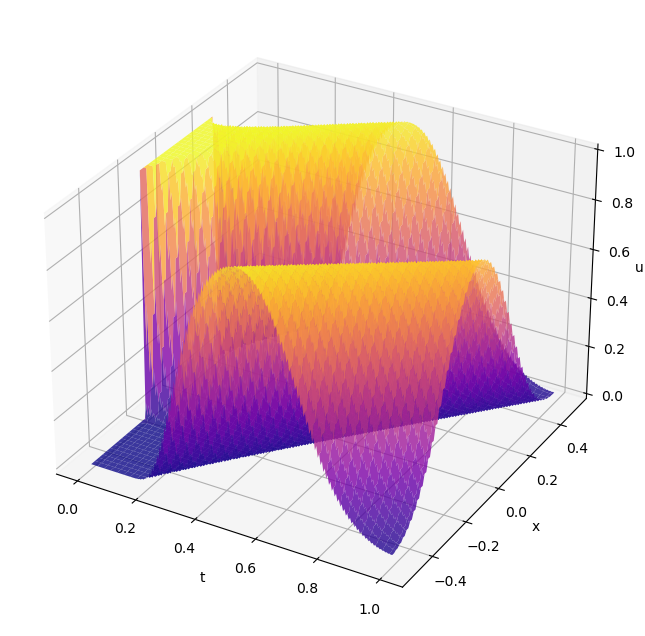

In [88]:
figure=plt.figure(figsize=(14,8))
ax=plt.axes(projection='3d')

X,T=np.meshgrid(x,t)

surf=ax.plot_surface(T,X,u,alpha=0.8,cmap=plt.cm.plasma)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u',labelpad=0)

In [76]:
bl=-0.5
br=0.5
ndp=100
mu=0.4455
a=1

ti=0
tf=1

x=np.linspace(bl,br,ndp)

dx=x[1]-x[0]

dt=mu*dx/a

t=np.arange(ti,tf,dt)

In [77]:
u=np.zeros((len(t),len(x)))

#u[0,:]=np.exp(-x**2*50)
u[0,int(ndp/2-20):int(ndp/2+20)]=1

In [78]:
for k in range(1,len(t)): #Loop over t values
    #Periodic boundary conditions, so calculate last value separately
    #u[k,0]=u[k-1,0]-mu/2*(u[k-1,1]-u[k-1,-1])
    for i in range(len(x)-1):
        u[k,i]=(u[k-1,i+1]+u[k-1,i-1])/2-mu/2*(u[k-1,i+1]-u[k-1,i-1])
    u[k,len(x)-1]=(u[k-1,len(x)-2]+u[k-1,0])/2-mu/2*(u[k-1,0]-u[k-1,len(x)-2])

Text(0.5, 0, 'u')

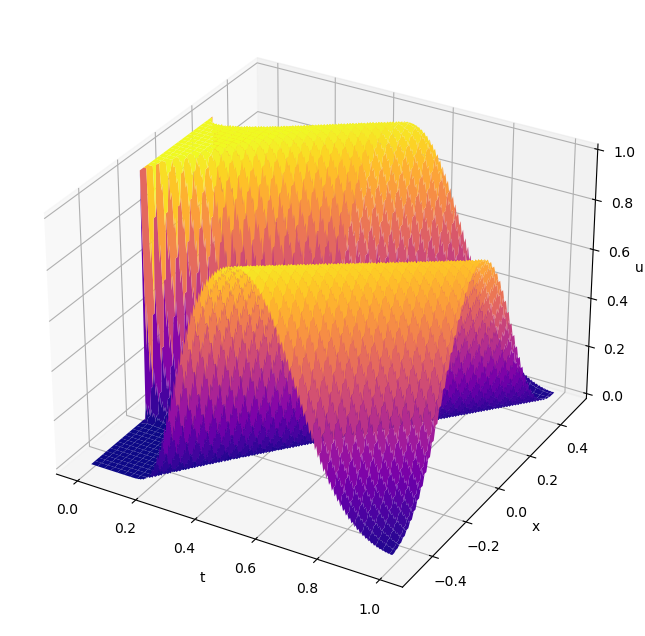

In [87]:
figure=plt.figure(figsize=(14,8))
ax=plt.axes(projection='3d')

X,T=np.meshgrid(x,t)

surf=ax.plot_surface(T,X,u, cmap=plt.cm.plasma)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u',labelpad=0)